# Project 2

In [52]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)

    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)
    
    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)

    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)

    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)

    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()

    # thresh = mat.max() / 2

    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw, fontsize=10)

    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()

## Part 1 -  Clustering on Text Data

### Question 1

In [53]:
from sklearn.datasets import fetch_20newsgroups

In [54]:
# categories
CLASS_1 = [
    "comp.graphics",
    "comp.os.ms-windows.misc",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware"
]

CLASS_2 = [
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "rec.sport.hockey",
]

# load dataset
class_1_dataset = fetch_20newsgroups(
    subset="all",
    categories=CLASS_1,
    shuffle=True,
    remove=("headers", "footers"),
)

class_2_dataset = fetch_20newsgroups(
    subset="all",
    categories=CLASS_2,
    shuffle=True,
    remove=("headers", "footers"),
)

all_dataset = class_1_dataset.data + class_2_dataset.data


In [55]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer


from nltk.corpus import stopwords


In [56]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [57]:
MIN_DF = 3

In [58]:
vectorizer = TfidfVectorizer(
    min_df=MIN_DF,
    stop_words="english"
)

train_tfidf = vectorizer.fit_transform(all_dataset)

In [59]:
train_tfidf.shape

(7882, 23522)

> Question 1: Report the dimensions of the TF-IDF matrix you obtain.

Answer: The dimenssions of the tfidf is (7882, 23522).

### Question 2

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(train_tfidf)

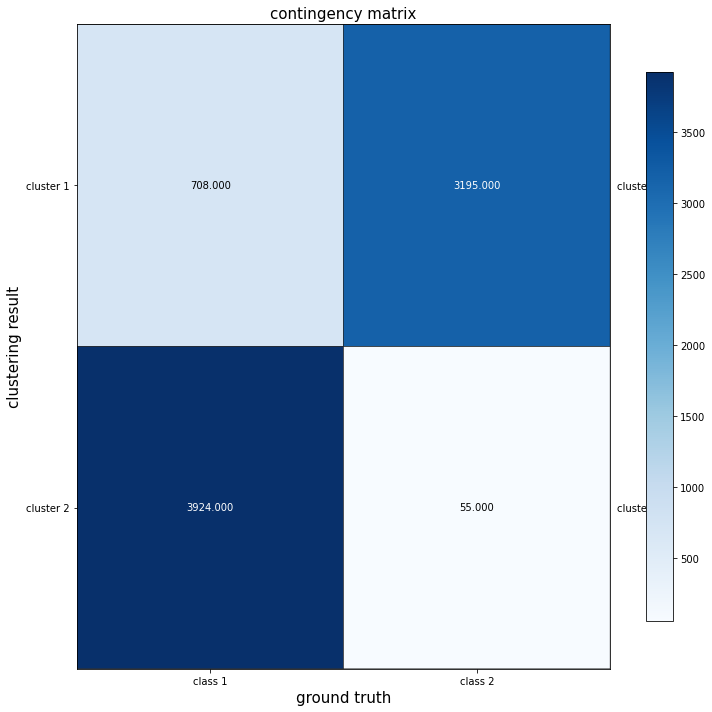

In [61]:
from sklearn.metrics.cluster import contingency_matrix

# ground truth
ground_truth = [0]*len(class_1_dataset.data) + [1]*len(class_2_dataset.data)
prediction = kmeans.labels_

cm = contingency_matrix(ground_truth, prediction)

plot_mat(cm,
         size=(10, 10),
         xticklabels=['class 1', 'class 2'],
         yticklabels=['cluster 1', 'cluster 2'],
         xlabel='ground truth',
         ylabel='clustering result',
         title='contingency matrix'
)

In [62]:
cm

array([[ 708, 3195],
       [3924,   55]])

> Does the contingency matrix have to
be square-shaped?

Answer:

- The contingency matrix doesn't have to be square-shaped. If the cluster produces less classes than the ground truth, The matrix will not be square-shaped.

### Question 3

In [63]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

def get_scores(gt, pr):
    homogeneity = homogeneity_score(gt, pr)
    completeness = completeness_score(gt, pr)
    v_measure = v_measure_score(gt, pr)
    adjusted_rand = adjusted_rand_score(gt, pr)
    adjusted_mutual_info = adjusted_mutual_info_score(gt, pr)


    return [homogeneity, completeness, v_measure, adjusted_rand, adjusted_mutual_info]



In [64]:
metric_names = ["Homogeneity","Completeness","V-measure","Adjusted Rand","Adjusted mutual information"]
metric_vals = get_scores(ground_truth, prediction)

print("\t".join(metric_names))
print("\t".join("%0.8f"%var for var in metric_vals))

Homogeneity	Completeness	V-measure	Adjusted Rand	Adjusted mutual information
0.58637900	0.59970793	0.59296857	0.65022778	0.59293088


### Question 4

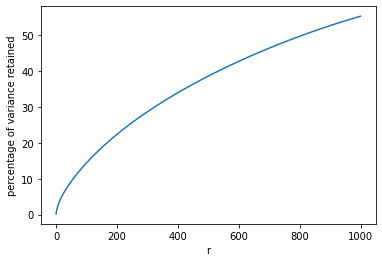

In [65]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000)
svd.fit(train_tfidf)

plt.plot(np.cumsum(svd.explained_variance_ratio_) * 100.0)
plt.xlabel('r')
plt.ylabel('percentage of variance retained')
plt.show()

### Question 5

In [66]:
r_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]

In [67]:
import pandas as pd

metric_names_with_r = ["r"] + metric_names

result_table = []

# for each r, exclude the least important features
for r in r_values:
    svd_r = svd.components_[:r, :]
    train_tfidf_r = train_tfidf.dot(svd_r.T)

    kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(train_tfidf_r)
    prediction = kmeans.labels_

    metric_vals = get_scores(ground_truth, prediction)
    metric_vals_with_r = [r] + metric_vals

    result_table.append(metric_vals_with_r)

result_table = pd.DataFrame(result_table, columns=metric_names_with_r)

result_table

,r,Homogeneity,Completeness,V-measure,Adjusted Rand,Adjusted mutual information
0,1,0.018977,0.019305,0.019140,0.025921,0.019049
1,2,0.530608,0.548025,0.539176,0.587168,0.539133
2,3,0.536545,0.553322,0.544804,0.594581,0.544762
3,4,0.500465,0.526147,0.512985,0.534351,0.512939
4,5,0.515851,0.538769,0.527061,0.556466,0.527017
5,6,0.525206,0.543645,0.534267,0.579029,0.534223
6,7,0.524842,0.543178,0.533852,0.579029,0.533809
7,8,0.537012,0.553075,0.544925,0.597324,0.544883
8,9,0.546215,0.563339,0.554645,0.602041,0.554603
9,10,0.549332,0.565981,0.557532,0.606381,0.557491


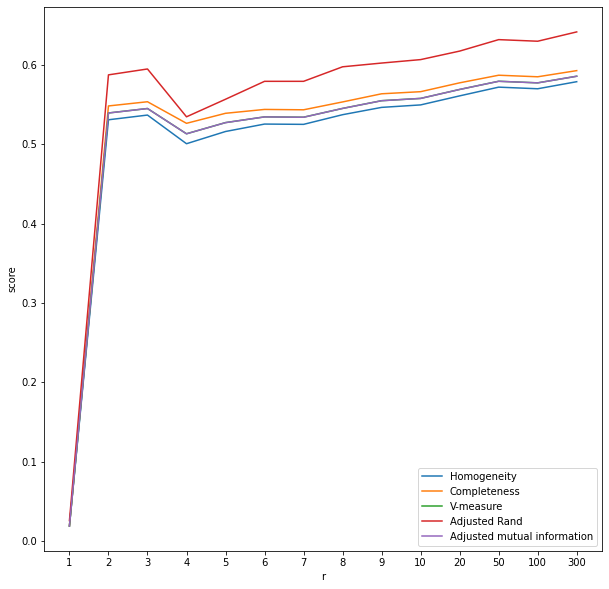

In [68]:
plt.figure(figsize=(10, 10))

# same gaps
r_str = [str(r) for r in r_values]
x_range = range(len(r_str))
plt.xticks(range(len(r_str)), r_str)

for cols in result_table.columns[1:]:
    plt.plot(x_range, result_table[cols], label=cols)

plt.xlabel('r')
plt.ylabel('score')
plt.legend()
plt.show()


In [69]:
# NMF

from sklearn.decomposition import NMF

r_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]

result_table_nmf = []

# for each r, exclude the least important features
for r in r_values:
    nmf = NMF(n_components=r, init='random', random_state=0)
    nmf.fit(train_tfidf)

    train_tfidf_r = nmf.transform(train_tfidf)

    kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(train_tfidf_r)
    prediction = kmeans.labels_

    metric_vals = get_scores(ground_truth, prediction)
    metric_vals_with_r = [r] + metric_vals

    result_table_nmf.append(metric_vals_with_r)

result_table_nmf = pd.DataFrame(result_table_nmf, columns=metric_names_with_r)

result_table_nmf

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


,r,Homogeneity,Completeness,V-measure,Adjusted Rand,Adjusted mutual information
0,1,0.019035,0.019360,0.019196,0.026003,0.019106
1,2,0.502248,0.526384,0.514033,0.540677,0.513987
2,3,0.475109,0.503936,0.489098,0.502558,0.489050
3,4,0.199182,0.294522,0.237647,0.119163,0.237563
4,5,0.484438,0.512753,0.498194,0.512321,0.498146
5,6,0.483544,0.507486,0.495226,0.524380,0.495179
6,7,0.497395,0.523889,0.510298,0.529169,0.510252
7,8,0.506433,0.523395,0.514774,0.566354,0.514729
8,9,0.129072,0.167863,0.145934,0.109378,0.145846
9,10,0.256390,0.340723,0.292601,0.192383,0.292527


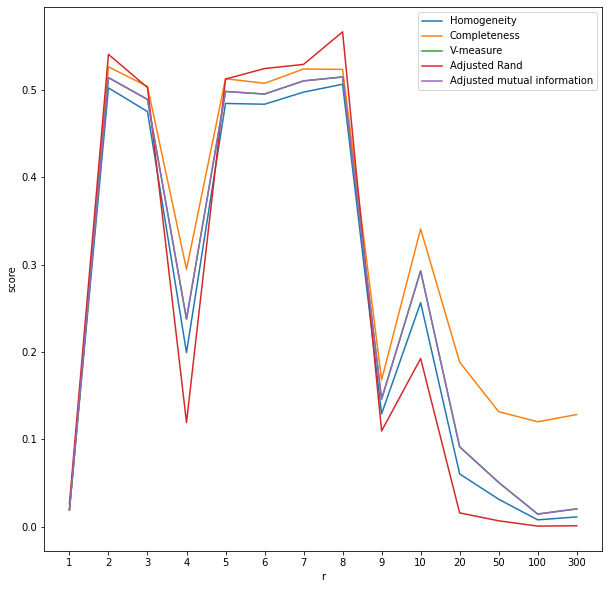

In [70]:
plt.figure(figsize=(10, 10))

r_str = [str(r) for r in r_values]
x_range = range(len(r_str))
plt.xticks(range(len(r_str)), r_str)

for cols in result_table_nmf.columns[1:]:
    plt.plot(x_range, result_table_nmf[cols], label=cols)

plt.xlabel('r')
plt.ylabel('score')
plt.legend()
plt.show()

> Report a good choice of r for SVD and NMF respectively.

Answer:
- For SVD, r = 3 is a better choice.
- For NMF, r = 9 is great.

### Question 6

> How do you explain the non-monotonic behavior of the measures as r increases?

Answer:

- When r increases, more data features would be retained. Also, reconstruction error will rise. At a certain point, the additional information may not contribute significantly to the performance. This tradeoff explains the non-monotonic behavior of the measures as r increases.

### Question 7

> Are these measures on average better than those computed in Question 3?

Answer:
- These measures are not better than Question 3. Because decomposition loses information after all. However, by chosing the propriete R value, the measures could be close to Question 3.

### Question 8

In [71]:
svd_r = 3
nmf_r = 8

In [72]:
def plot_result(X, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')    
    plt.show()

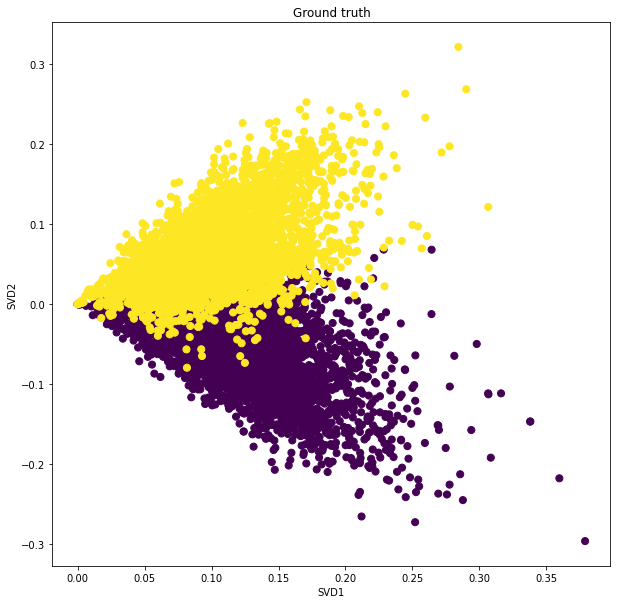

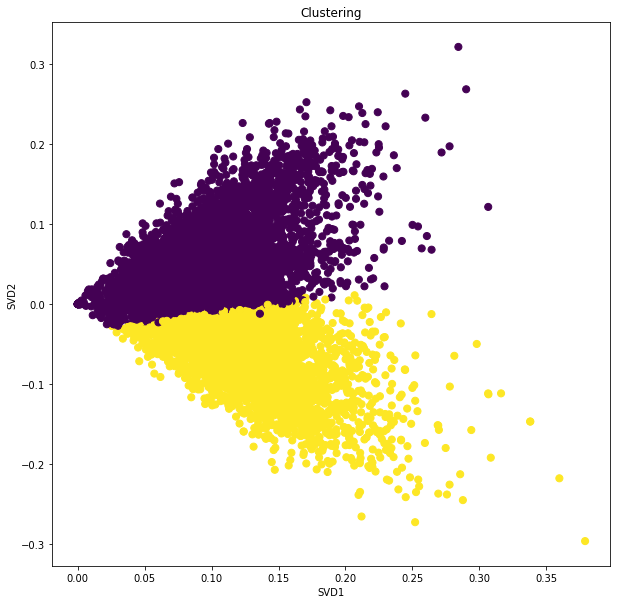

In [73]:
# SVD

svd = TruncatedSVD(n_components=svd_r)
result_svd = svd.fit_transform(train_tfidf)

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(result_svd)
prediction = kmeans.labels_

plot_result(result_svd, ground_truth, "Ground truth", "SVD1", "SVD2")
plot_result(result_svd, prediction, "Clustering", "SVD1", "SVD2")

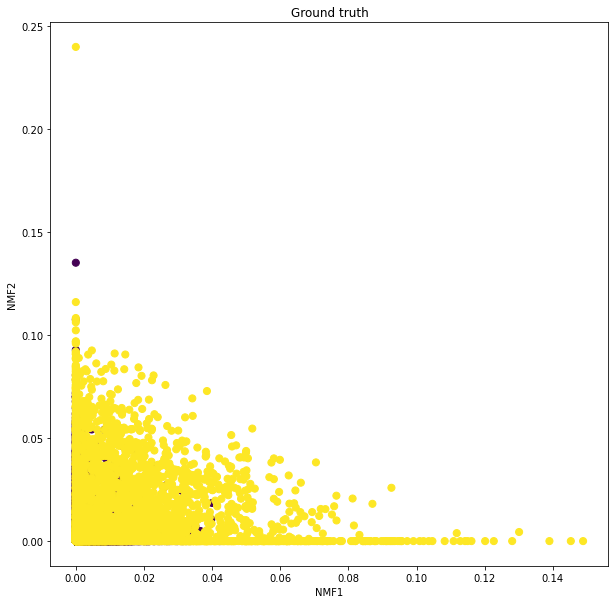

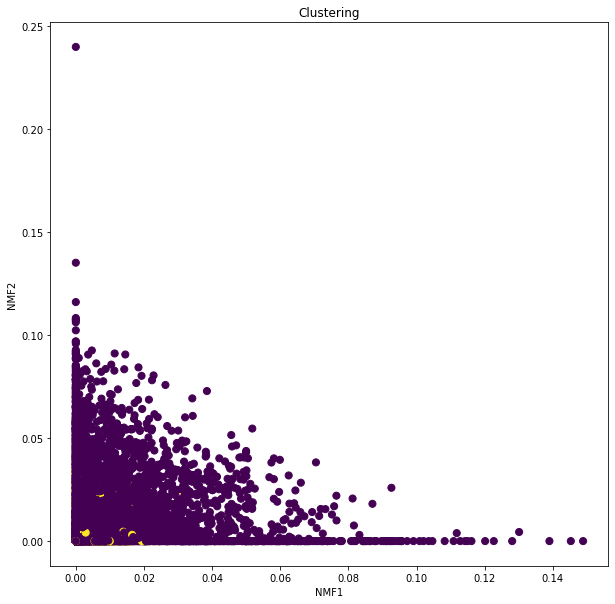

In [74]:
# NMF
from sklearn.decomposition import NMF

nmf = NMF(n_components=nmf_r, init='random', random_state=0, max_iter=1000)
result_nmf = nmf.fit_transform(train_tfidf)

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(result_nmf)
prediction = kmeans.labels_

plot_result(result_nmf, ground_truth, "Ground truth", "NMF1", "NMF2")
plot_result(result_nmf, prediction, "Clustering", "NMF1", "NMF2")

### Question 9

> What do you observe in the visualization? How are the data points of the
two classes distributed? Is distribution of the data ideal for K-Means clustering?

Answer:

- The SVD plots are seperate from each other. It's good for K-Means clustering.
- The NMF results are mixed with each other. It's not ideal for K-Means clustering

### Question 10

In [75]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    return cm[rows[:, np.newaxis], cols], rows, cols

In [76]:
all_feature_data = fetch_20newsgroups(
    subset='all',
    shuffle=True,
    random_state=42,
)

vectorizer_all = TfidfVectorizer(
    min_df=MIN_DF,
    stop_words="english"
)

train_tfidf_all = vectorizer_all.fit_transform(all_feature_data.data)

In [77]:
# SVD

svd_r = 120

svd = TruncatedSVD(n_components=svd_r)
result_svd_all = svd.fit_transform(train_tfidf_all)

kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30).fit(result_svd_all)
prediction_svd = kmeans.labels_

cm_svd, rows_svd, cols_svd = get_confusion_matrix(all_feature_data.target, prediction_svd)

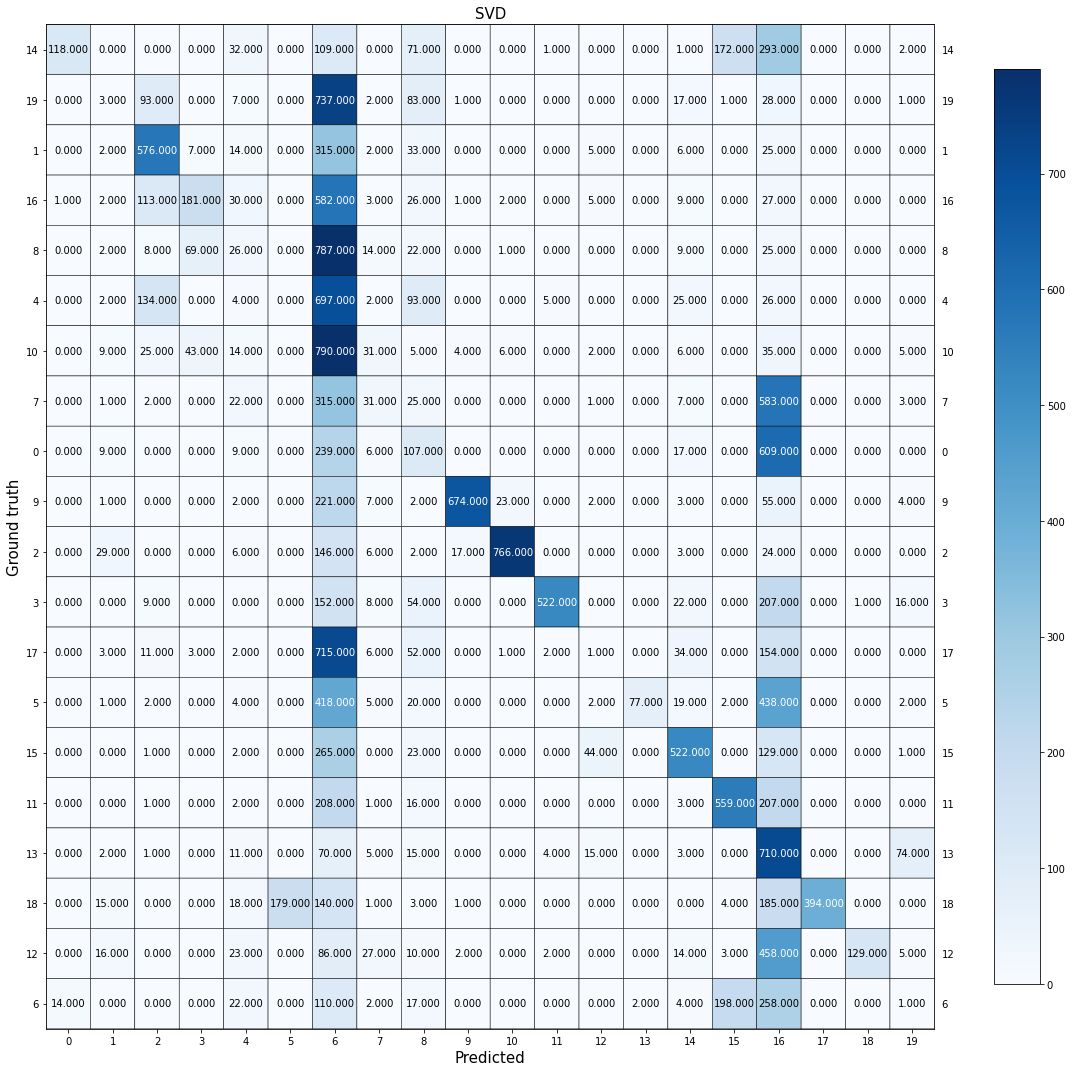

In [78]:
plot_mat(
    mat=cm_svd,
    size=(15, 15),
    title="SVD",
    xlabel="Predicted",
    ylabel="Ground truth",
    xticklabels=rows_svd,
    yticklabels=cols_svd,
)

In [79]:
import pandas as pd

#  report the five clustering metrics for SVD
metric_vals_svd = get_scores(all_feature_data.target, prediction_svd)
result_table_svd_all = pd.DataFrame([metric_vals_svd], columns=metric_names)
result_table_svd_all


,Homogeneity,Completeness,V-measure,Adjusted Rand,Adjusted mutual information
0,0.323858,0.466411,0.382278,0.107912,0.379881


In [80]:
# NMF

nmf_r = 30

nmf = NMF(n_components=nmf_r, init='random', random_state=0, max_iter=1000)
result_nmf_all = nmf.fit_transform(train_tfidf_all)

kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30).fit(result_nmf_all)
prediction_nmf = kmeans.labels_

cm_nmf, rows_nmf, cols_nmf = get_confusion_matrix(all_feature_data.target, prediction_nmf)

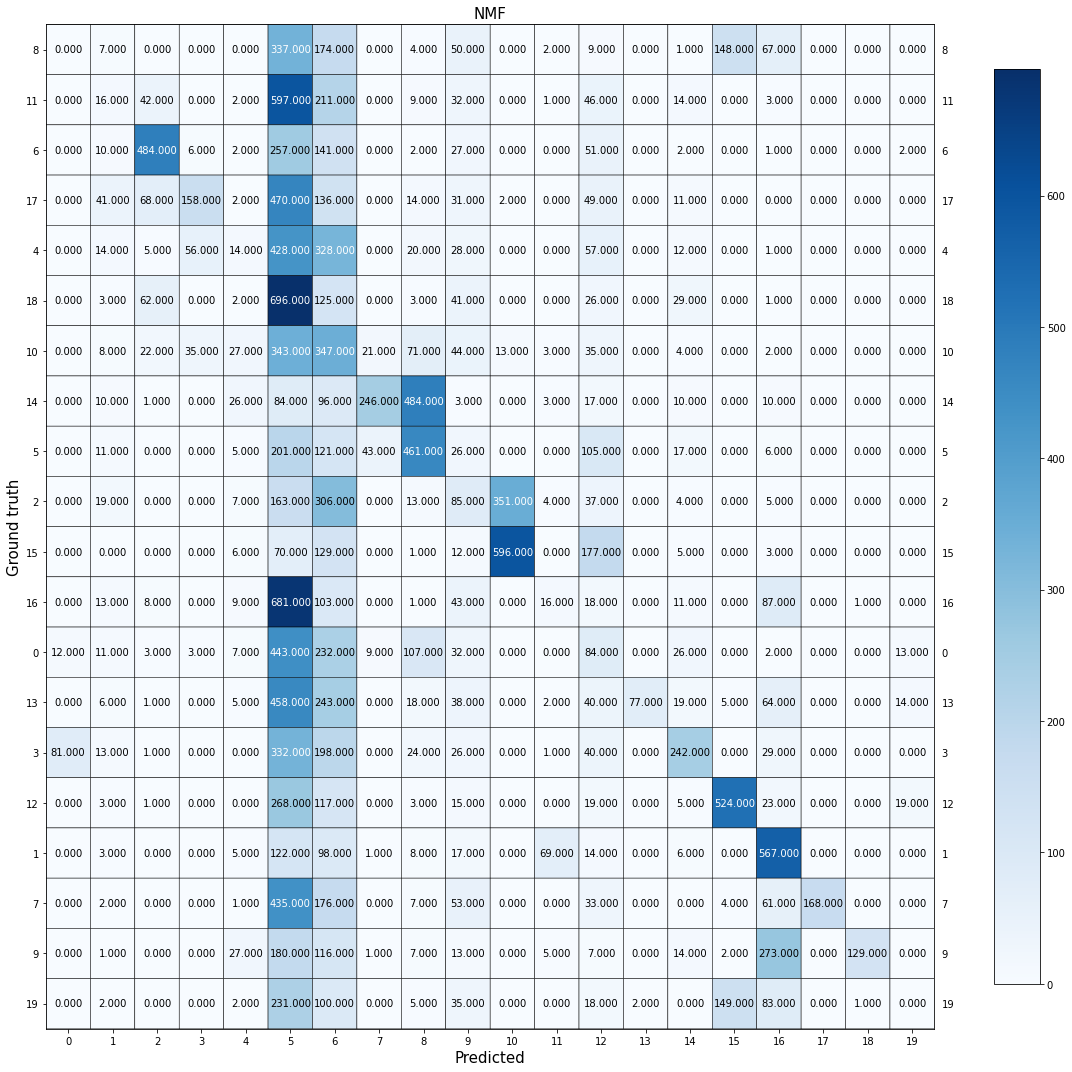

In [81]:
plot_mat(
    mat=cm_nmf,
    size=(15, 15),
    title="NMF",
    xlabel="Predicted",
    ylabel="Ground truth",
    xticklabels=rows_nmf,
    yticklabels=cols_nmf,
)

In [82]:
metric_vals_nmf = get_scores(all_feature_data.target, prediction_nmf)
result_table_nmf_all = pd.DataFrame([metric_vals_nmf], columns=metric_names)
result_table_nmf_all

,Homogeneity,Completeness,V-measure,Adjusted Rand,Adjusted mutual information
0,0.239692,0.327881,0.276935,0.068402,0.274183


### Question 11

In [83]:
from umap import UMAP
from sklearn.cluster import KMeans

n_components_umap = [5, 20, 200]
metric_umap = ["cosine", "euclidean"]

umap_results = []

for n_component in n_components_umap:
    for metric in metric_umap:
        umap_model = UMAP(n_components=n_component, metric=metric)
        result_umap = umap_model.fit_transform(train_tfidf_all)
        kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30).fit(result_umap)
        umap_prediction = kmeans.labels_
        cm_umap, rows, cols = get_confusion_matrix(all_feature_data.target, umap_prediction)
        metric_vals_umap = get_scores(all_feature_data.target, umap_prediction)
        umap_results.append({
            "n_component": n_component,
            "metric": metric,
            "cm": cm_umap,
            "rows": rows,
            "cols": cols,
            "metric_vals": metric_vals_umap
        })



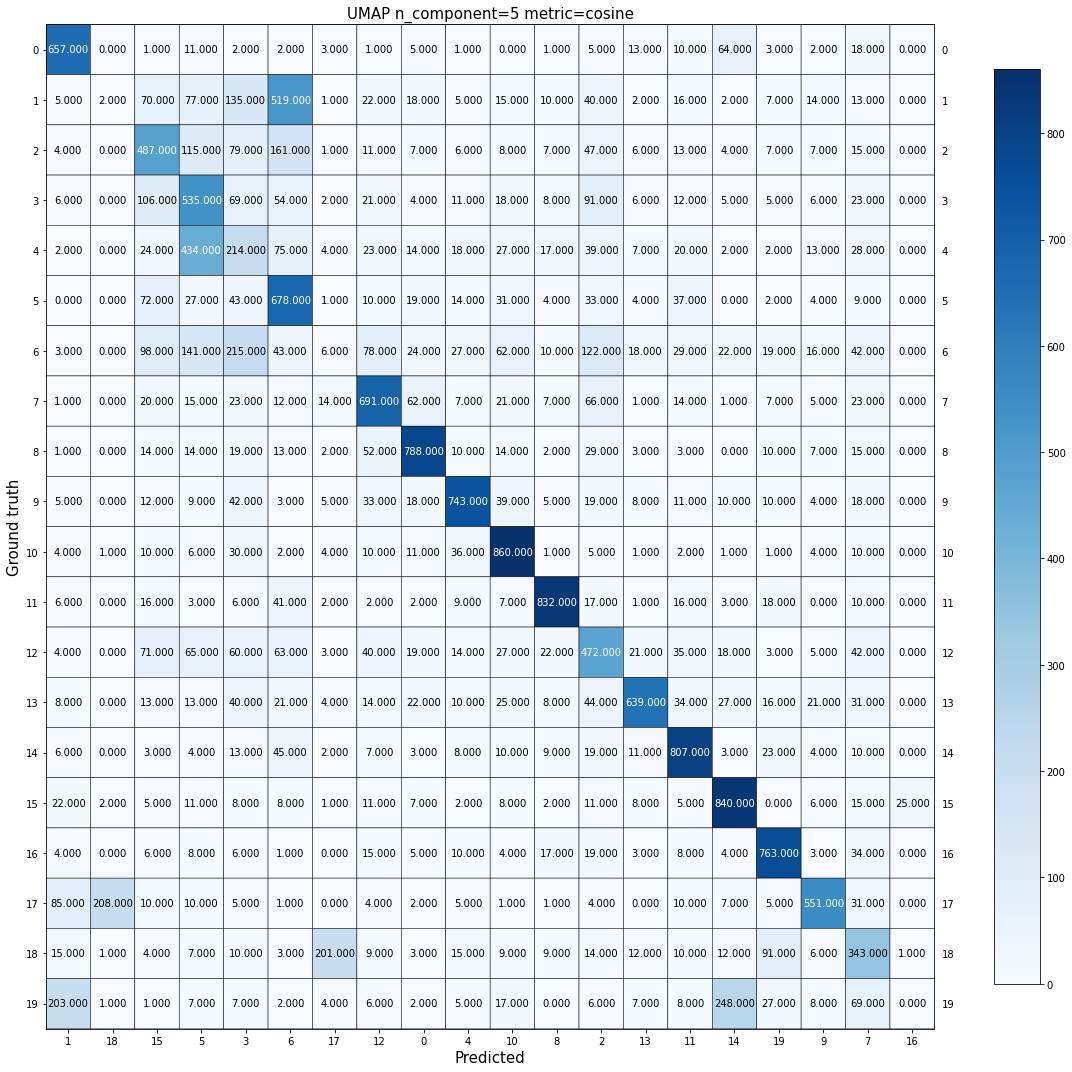

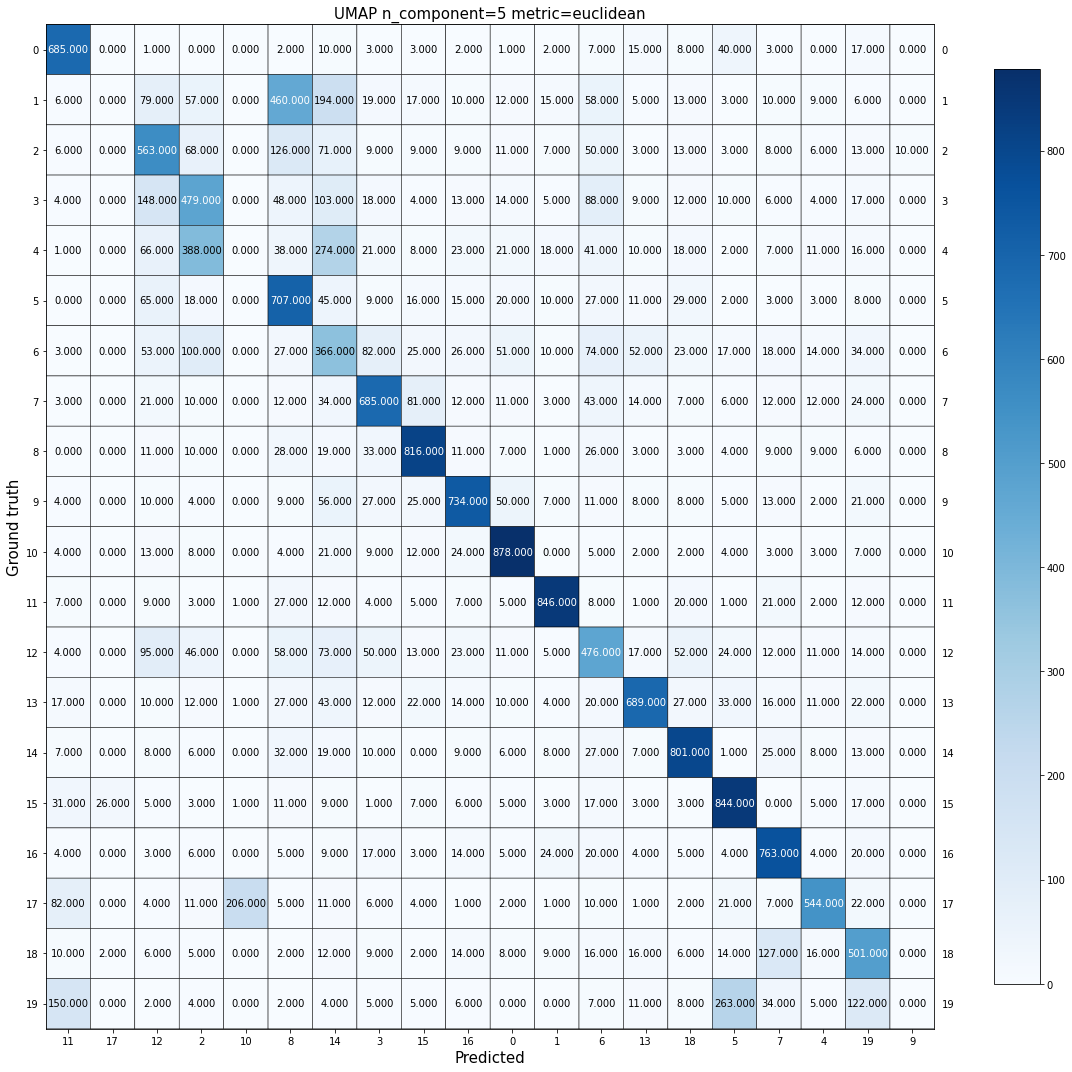

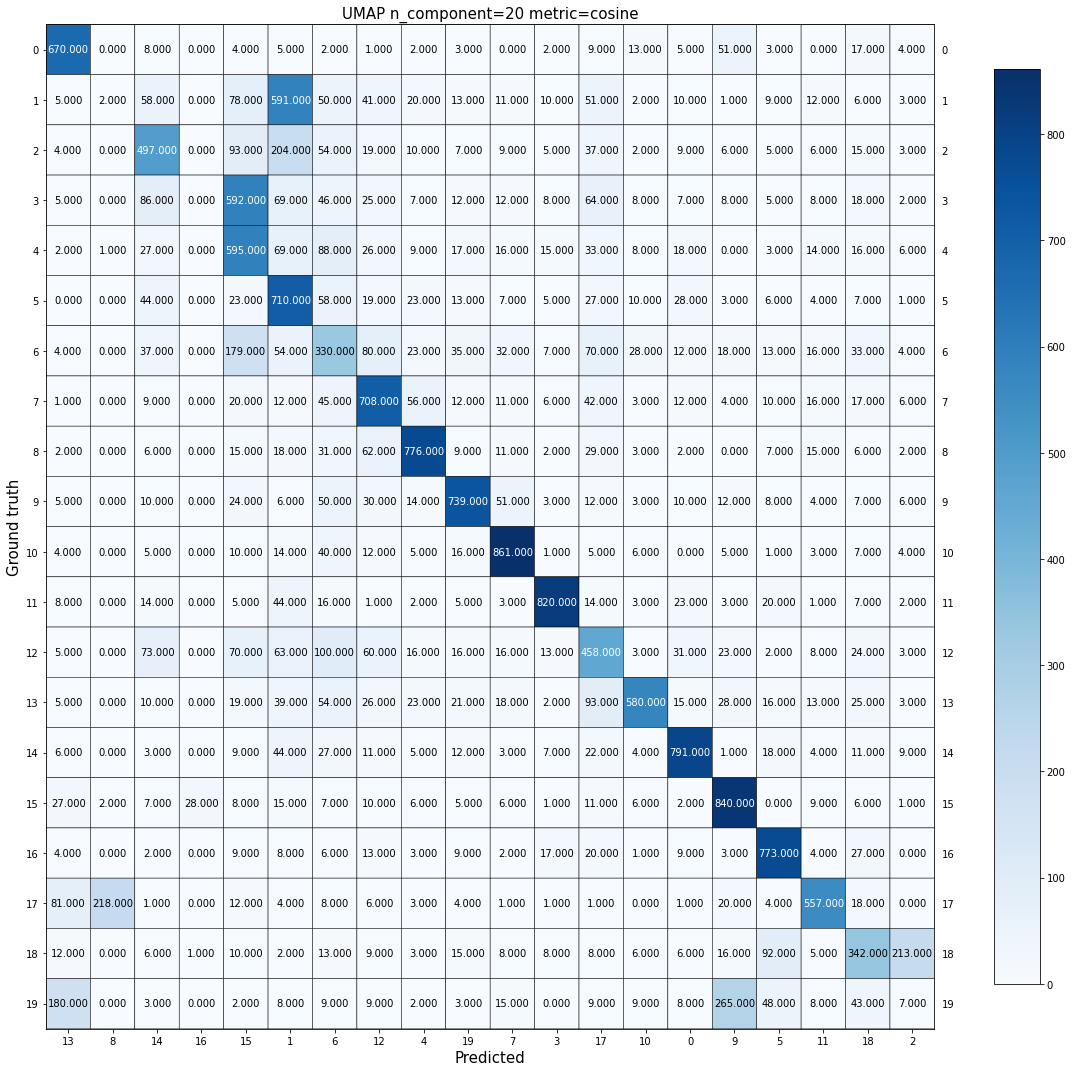

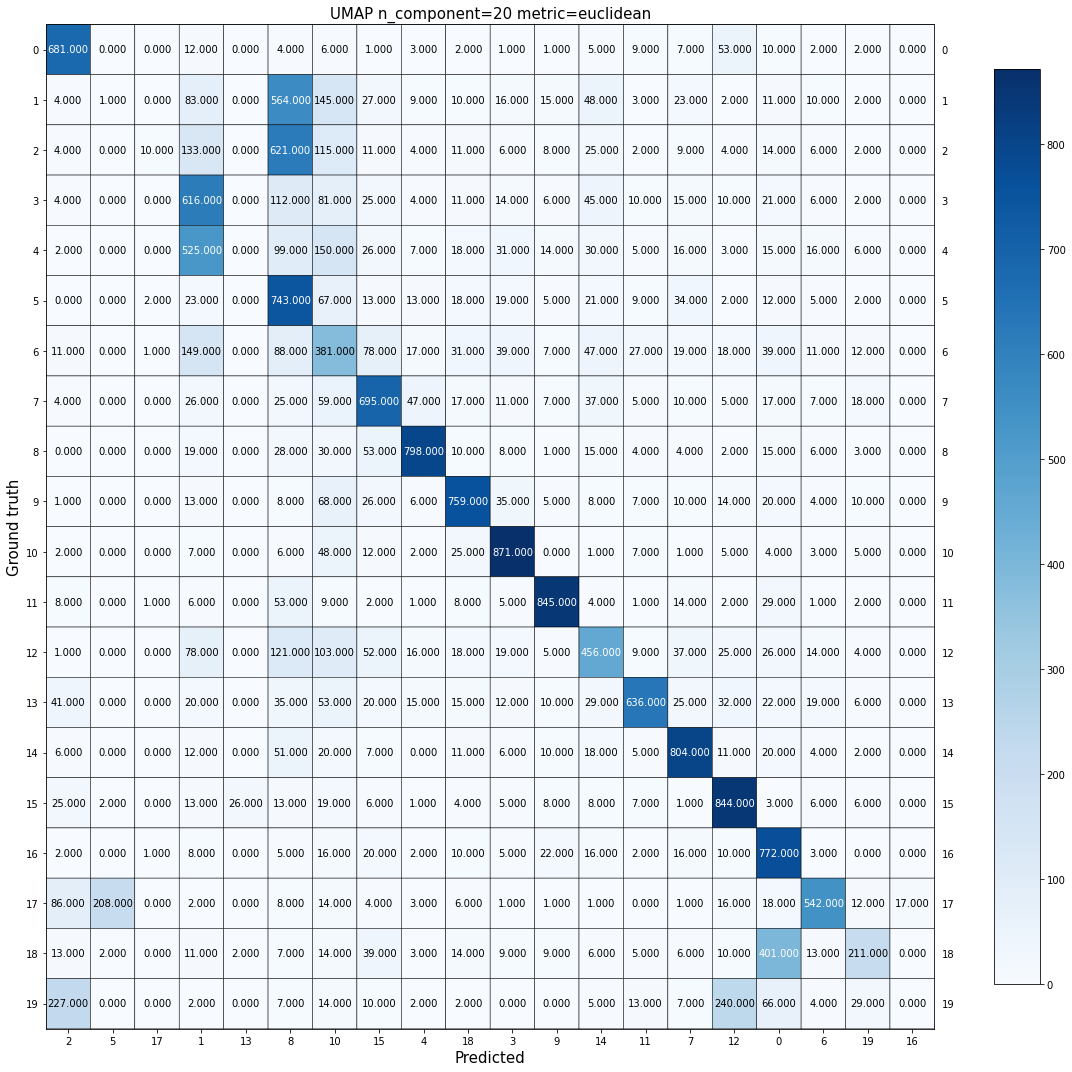

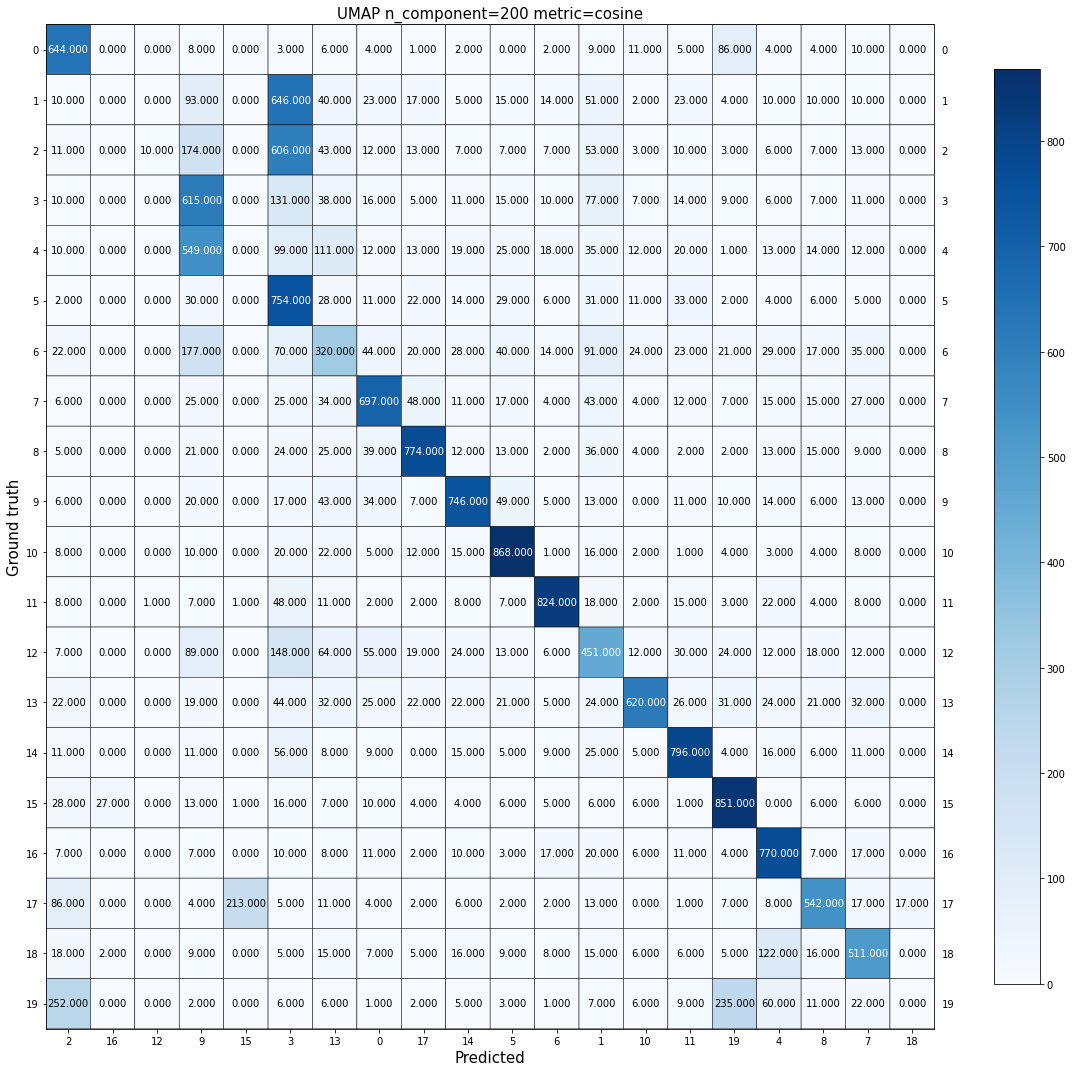

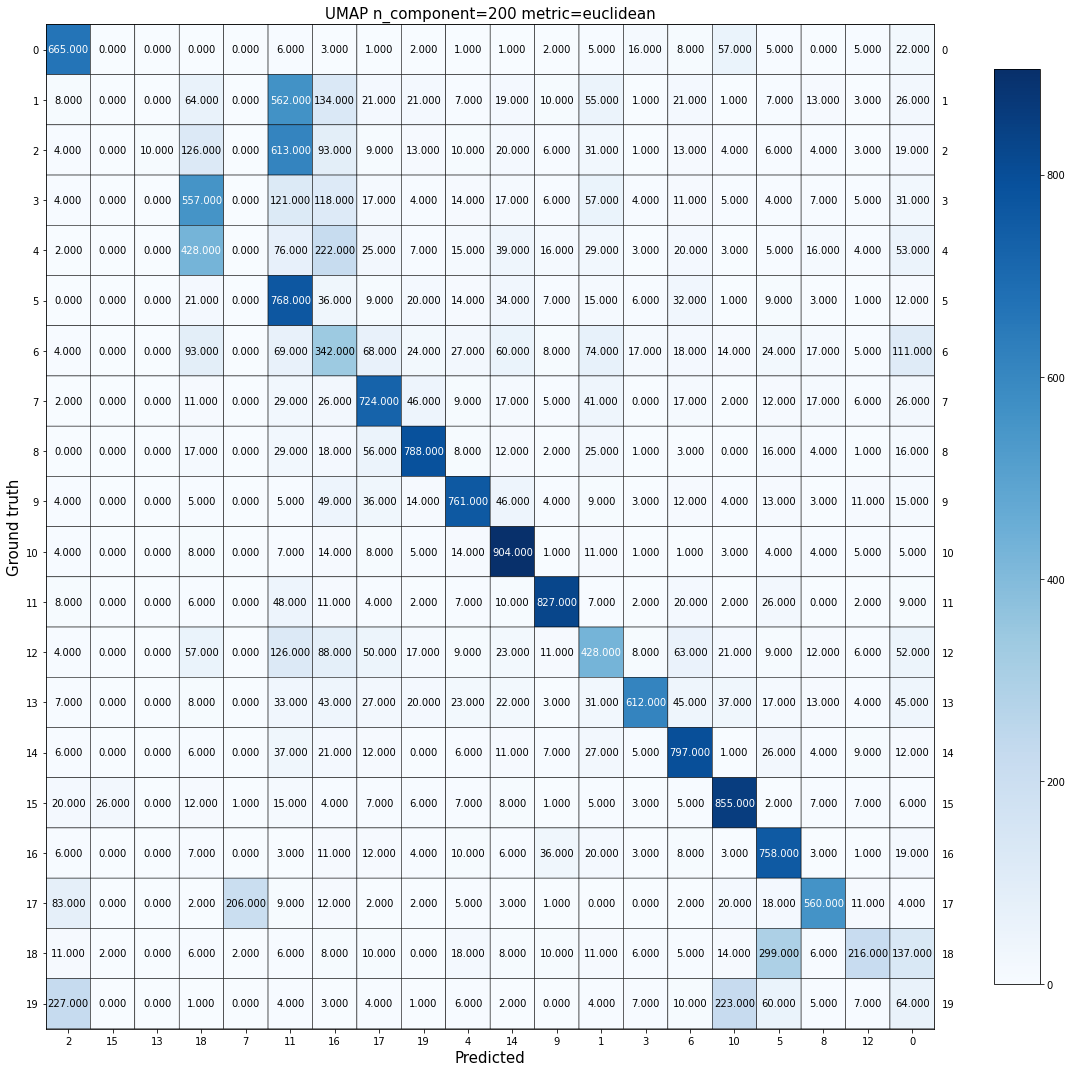

In [84]:
import pandas as pd

# plot the results
for umap_result in umap_results:
    plot_mat(
        mat=umap_result["cm"],
        size=(15, 15),
        title=f"UMAP n_component={umap_result['n_component']} metric={umap_result['metric']}",
        xlabel="Predicted",
        ylabel="Ground truth",
        xticklabels=umap_result["cols"],
        yticklabels=umap_result["rows"],
    )

In [85]:
umap_metric_results = pd.DataFrame()
for umap_result in umap_results:
    # columns: n_component, metric, metric_vals
    # avoid TypeError: 'list' object is not a mapping

    metrics = zip(metric_names, umap_result["metric_vals"])

    umap_metric_results = umap_metric_results.append(
        pd.DataFrame([{
            "n_component": umap_result["n_component"],
            "metric": umap_result["metric"],
            **dict(metrics)
        }])

    )


# display the results
umap_metric_results

,n_component,metric,Homogeneity,Completeness,V-measure,Adjusted Rand,Adjusted mutual information
0,5,cosine,0.501486,0.520918,0.511017,0.405058,0.509394
0,5,euclidean,0.512281,0.536511,0.524116,0.421472,0.522528
0,20,cosine,0.510263,0.532891,0.521332,0.410485,0.519739
0,20,euclidean,0.496306,0.542622,0.518431,0.385819,0.516770
0,200,cosine,0.492372,0.535643,0.513097,0.386752,0.511428
0,200,euclidean,0.500281,0.535676,0.517374,0.392424,0.515746


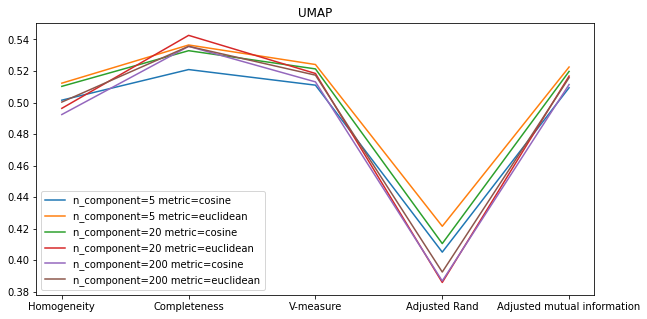

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("UMAP")
for umap_result in umap_results:
    plt.plot(metric_names, umap_result["metric_vals"], label=f"n_component={umap_result['n_component']} metric={umap_result['metric']}")

plt.legend()
plt.show()

### Question 12

> Analyze the contingency matrices. Which setting works best and why? What about for each metric choice?

Answer:

- `n_component=200` and `metric='cosine'` works best. Because in the confusion matrix, the diagonal elements are the largest. It means the most data points are clustered correctly.
- For each metric choice, the best setting is `n_component=200` and `metric='euclidean'`. The curve of this setting is the highest.

### Question 13

> So far, we have attempted K-Means clustering with 4 different representation learning techniques (sparse TF-IDF representation, PCA-reduced, NMF-reduced, UMAP-reduced). Compare and contrast the clustering results across the 4 choices, and suggest an approach that is best for the K-Means clustering task on the 20-class text data. Choose any choice of clustering metrics for your comparison.

Answer: 

We choosing each model best score(using Adjusted Rand) and get that

Sparse Tf-idf representation: 0.002026935

PCA-reduced: 0.072113	

NMF-reduced: 0.068402	

UMAP-reduced: 0.525572

Therefore, UMAP-reduced is the best choice for K-Means clustering task on the 20-class text data. Because the original TF-IDF matrix is sparse. The sparse matrix is not suitable for K-Means clustering. PCA-reduced and NMF-reduced are both linear methods. They are not good for non-linear data like text data. UMAP-reduced is a non-linear method to solve the problem. It's the best choice for K-Means clustering task on the 20-class text data.



### Question 14
>Use UMAP to reduce the dimensionality properly, and perform Agglom-
erative clustering with n_clusters=20 . Compare the performance of “ward” and “single”
linkage criteria.

Answer: We can observe that "ward" performs better than "Single" from below 5 evaluation metrics.

In [87]:
# !pip install umap-learn

In [88]:
# reduce dimensionality with UMAP
import umap
from umap import UMAP
from sklearn.cluster import KMeans
umap_set = umap.UMAP(n_components=20, metric='cosine')
umap_set_embedding = umap_set.fit_transform(train_tfidf_all)

In [89]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import contingency_matrix
from sklearn import metrics

In [90]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
def print_get_scores(metrics_list):
    print('Homogeneity: {}'.format(metrics_list[0]))
    print('Completeness: {}'.format(metrics_list[1]))
    print('V-Measure: {}'.format(metrics_list[2]))
    print('Adjusted Rand Index: {}'.format(metrics_list[3]))
    print('Adjusted mutual info: {}'.format(metrics_list[4]))

def get_scores(gt, pr, print_metrics = False):
    homogeneity = homogeneity_score(gt, pr)
    completeness = completeness_score(gt, pr)
    v_measure = v_measure_score(gt, pr)
    adjusted_rand = adjusted_rand_score(gt, pr)
    adjusted_mutual_info = adjusted_mutual_info_score(gt, pr)
    metrics_list = [homogeneity, completeness, v_measure, adjusted_rand, adjusted_mutual_info]

    if print_metrics:
      print_get_scores(metrics_list = [homogeneity, completeness, v_measure, adjusted_rand, adjusted_mutual_info])
    else:
      return metrics_list


In [91]:
agg_ward_20_cate_umap = AgglomerativeClustering(
    n_clusters= 20,
    linkage='ward'
)
dataset_20_cate = fetch_20newsgroups(
    subset='all',  
    shuffle=True, 
    random_state=42,
    remove=('headers', 'footers')
)
y_20_cate = [t for t in dataset_20_cate.target]
y_pred_20_agg_ward = agg_ward_20_cate_umap.fit_predict(umap_set_embedding)
con_mat_20_cate_agg_ward = contingency_matrix(y_20_cate, y_pred_20_agg_ward)
print("Umap with ward linkage criteria")
get_scores(y_20_cate, y_pred_20_agg_ward,print_metrics = True)

Umap with ward linkage criteria
Homogeneity: 0.48089654264526915
Completeness: 0.5170460381320549
V-Measure: 0.49831655030184696
Adjusted Rand Index: 0.3712323953144722
Adjusted mutual info: 0.4966201208731118


In [92]:
agg_single_20_cate_umap = AgglomerativeClustering(
    n_clusters= 20,
    linkage='single'
)
y_pred_20_agg_single = agg_single_20_cate_umap.fit_predict(umap_set_embedding)
con_mat_20_cate_agg_single = contingency_matrix(y_20_cate, y_pred_20_agg_single)
print("Umap with ward Single criteria")
get_scores(y_20_cate, y_pred_20_agg_single,print_metrics = True)

Umap with ward Single criteria
Homogeneity: 0.053581490523577496
Completeness: 0.4139980074539546
V-Measure: 0.09488281846882834
Adjusted Rand Index: 0.006423837906884103
Adjusted mutual info: 0.0894771619116232


### Question 15
>Apply HDBSCAN on UMAP-transformed 20-category data.
Use min_cluster_size=100 .
Vary the min cluster size among 20, 100, 200 and report your findings in terms of the
five clustering evaluation metrics - you will plot the best contingency matrix in the
next question. Feel free to try modifying other parameters in HDBSCAN to get
better performance.

Answer: We experiment on the hyperparameter "min_cluster_size" Finally got min_cluster_size = 20 is the best result in this question.



In [93]:
# pip install hdbscan

In [94]:
import hdbscan
def hdbscan_best_mcs(umap_embedding,label,mcs_list,results):
  for mcs in mcs_list:

    print("==== HDBSCAN min_cluster_size = {} ====".format(mcs))

    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=mcs)
    y_pred_20_umap = hdbscan_model.fit_predict(umap_embedding)
    con_mat_20_cate_umap = contingency_matrix(label, y_pred_20_umap)
    homogeneity_20_cate_umap = metrics.homogeneity_score(label,y_pred_20_umap)
    completeness_20_cate_umap = metrics.completeness_score(label,y_pred_20_umap)
    v_measure_20_cate_umap = metrics.v_measure_score(label,y_pred_20_umap)
    adjusted_rand_index_20_cate_umap = metrics.adjusted_rand_score(label,y_pred_20_umap)
    adjusted_mutual_info_20_cate_umap = metrics.adjusted_mutual_info_score(label,y_pred_20_umap)

    results["homogeneity"].append(homogeneity_20_cate_umap)
    results["completeness"].append(completeness_20_cate_umap)
    results["v_measure"].append(v_measure_20_cate_umap)
    results["adjusted_rand_index"].append(adjusted_rand_index_20_cate_umap)
    results["adjusted_mutual_info"].append(adjusted_mutual_info_20_cate_umap)
    print("Homogeneity: \t\t", homogeneity_20_cate_umap)
    print("Completeness: \t\t", completeness_20_cate_umap)
    print("V-measure:    \t\t", v_measure_20_cate_umap)
    print("Adjusted Rand: \t\t", adjusted_rand_index_20_cate_umap)
    print("Adjusted mutual info: \t", adjusted_mutual_info_20_cate_umap)


In [95]:
mcs_list = [20,100,200]
results_hdbscan = {
    "homogeneity": [],
    "completeness": [],
    "v_measure": [],
    "adjusted_rand_index": [],
    "adjusted_mutual_info": []
}

In [96]:
hdbscan_best_mcs(umap_set_embedding,y_20_cate,mcs_list,results_hdbscan)

==== HDBSCAN min_cluster_size = 20 ====
Homogeneity: 		 0.3841915361749665
Completeness: 		 0.35901930710430413
V-measure:    		 0.37117913539656194
Adjusted Rand: 		 0.04231324022253302
Adjusted mutual info: 	 0.351190646409753
==== HDBSCAN min_cluster_size = 100 ====
Homogeneity: 		 0.013564952668808397
Completeness: 		 0.48765112669457794
V-measure:    		 0.026395659376710165
Adjusted Rand: 		 0.0005885686516248911
Adjusted mutual info: 	 0.025719544488126564
==== HDBSCAN min_cluster_size = 200 ====
Homogeneity: 		 0.013564952668808397
Completeness: 		 0.48765112669457794
V-measure:    		 0.026395659376710165
Adjusted Rand: 		 0.0005885686516248911
Adjusted mutual info: 	 0.025719544488126564


### Question 16
>Contingency matrix
Plot the contingency matrix for the best clustering model from Question 15.
How many clusters are given by the model? What does “-1” mean for the clustering labels?
Interpret the contingency matrix considering the answer to these questions.

Answer: The HDBSCAN contingency matrix is plotted with a minimum cluster size of 20, resulting in 167 clusters. The label "-1" indicates the presence of noisy samples in the clustering. The majority of the columns are blank as the number of clusters is less than the actual number of labels. To present the contingency matrix in a rectangular format, all columns with '0' values have been removed. This is a significant factor in the low metrics for HDBSCAN, as it assumes that the data is divided into non-overlapping clusters and does not consider noise as a cluster.

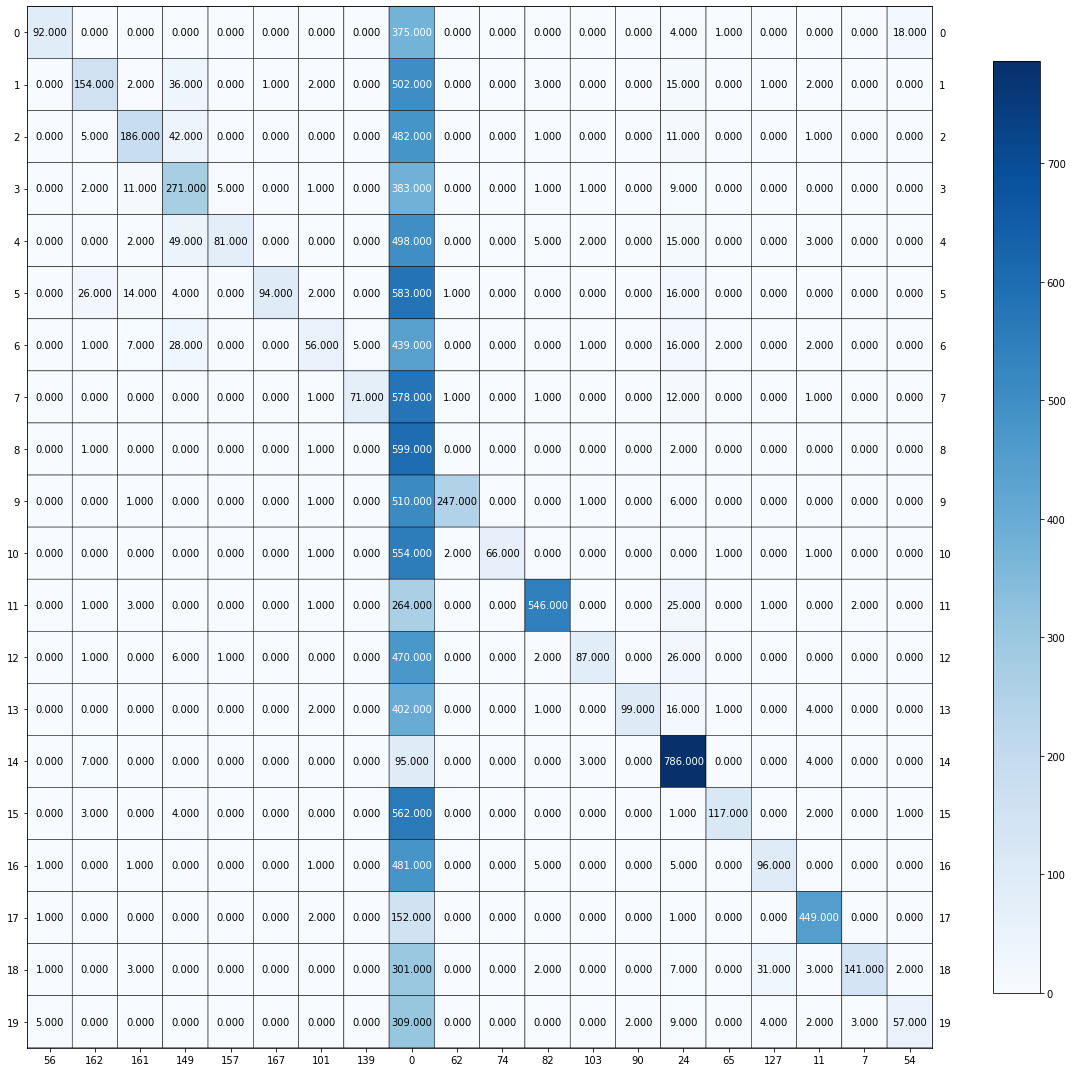

In [97]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size= 20)
y_pred_20_hdbscan = hdbscan_model.fit_predict(umap_set_embedding)
con_mat_20_cate_hdbscan = contingency_matrix(y_20_cate, y_pred_20_hdbscan)
rows, cols = linear_sum_assignment(con_mat_20_cate_hdbscan, maximize=True)
plot_mat(con_mat_20_cate_hdbscan[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

In [98]:
num_of_clusters = len(set(hdbscan_model.labels_)) - (1 if -1 in hdbscan_model.labels_ else 0)
print("Number of Clusters:"+ str(num_of_clusters)) 
num_of_noise = list(hdbscan_model.labels_).count(-1)
print("Number of Noise Datapoints: "+ str(num_of_noise)) 

Number of Clusters:167
Number of Noise Datapoints: 8539


### Question 17
>Based on your experiments, which dimensionality reduction technique and clustering methods worked best together for 20-class text data and why? Follow the table below. IfUMAP takes too long to converge, consider running it once and saving the intermediate results ina pickle file.Hint: DBSCAN and HDBSCAN do not accept the number of clusters as an input parameter. So pay close attention to how the different clustering metrics are being computed for these methods

Answer: By building a pipline and search the result by different methods for both Dimensionality Reduction and K-means clustering, (Specially code shown below)

We finally find that it seems that UMAP as dimensionality reduction method with K-means clustering method with K-means clustering work best together for 20-class text data.

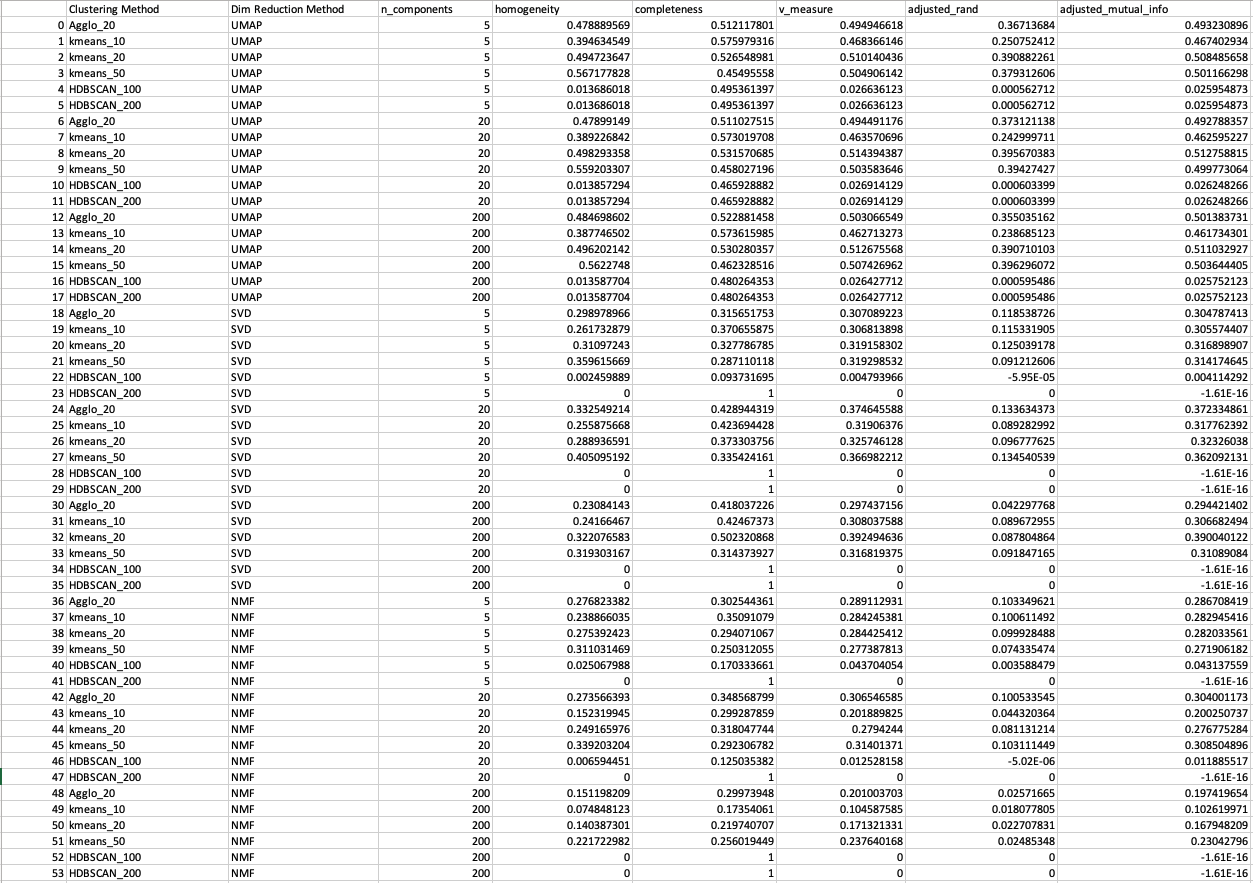

In [99]:
#=============== Dimensionality Reduction ===================
# from umap import UMAP
from sklearn.decomposition import TruncatedSVD


# SVD
svd = TruncatedSVD(n_components=50)

#NMF
from sklearn.decomposition import NMF


#UMAP
import umap.umap_ as umap
UMAP = umap.UMAP(n_components=5, metric="cosine")

In [100]:
#===============Clustering Techniques===================
#KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, max_iter=1000, n_init=30)

#HDBSCAN
import hdbscan

# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
Agglo = AgglomerativeClustering(n_clusters= 20, linkage='ward')

In [108]:
#=============== Pipeline ===================

import pandas as pd
from sklearn.decomposition import NMF
train = train_tfidf_all
gt = all_feature_data.target

scores_dict = {'Clustering Method': [],
                'Dim Reduction Method': [],
               'n_components': [],
                'homogeneity': [],
               'completeness': [],
               'v_measure': [],
               'adjusted_rand': [],
               'adjusted_mutual_info':[]
                }

for i in ['UMAP','SVD','NMF', 'None']:
    
    for n_components in [5, 20, 200]:
        if i == 'UMAP':
            dim_method_ = umap.UMAP(n_components=n_components, metric="cosine")
            train_reduced = dim_method_.fit_transform(train)
            n_components_ = n_components
        if i == 'SVD':
            dim_method_ = TruncatedSVD(n_components=n_components)
            train_reduced = dim_method_.fit_transform(train)
            n_components_ = n_components
        if i == 'NMF':
            dim_method_ = NMF(n_components=n_components, init='random', random_state=0)
            train_reduced = dim_method_.fit_transform(train)
            n_components_ = n_components
            
        if i == 'None':
            if n_components == 5:
                train_reduced = train
                n_components_ = -1
            else:
                break

        for j in ['Agglo', 'kmeans', 'HDBSCAN']:
          if j == 'HDBSCAN':
              for mcs in [100,200]:
                  hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=mcs)
                  pred = hdbscan_model.fit_predict(train_reduced)
                  c_name = j + '_' + str(mcs)
                  scores = get_scores(gt, pred, print_metrics = False)

                  scores_dict['Clustering Method'].append(c_name)
                  scores_dict['Dim Reduction Method'].append(i)
                  scores_dict['n_components'].append(n_components_)
                  scores_dict['homogeneity'].append(scores[0])
                  scores_dict['completeness'].append(scores[1])
                  scores_dict['v_measure'].append(scores[2])
                  scores_dict['adjusted_rand'].append(scores[3])
                  scores_dict['adjusted_mutual_info'].append(scores[4])   

          if j == 'Agglo':
                  y_pred_20_agg_ward = agg_ward_20_cate_umap.fit_predict(umap_set_embedding)
                  Agglo_model = AgglomerativeClustering(n_clusters= 20, linkage='ward')
                  y_20_cate = [t for t in dataset_20_cate.target]
                  pred = Agglo_model.fit_predict(train_reduced)
                  c_name = j + '_' + str(20)
                  scores = get_scores(y_20_cate, y_pred_20_agg_ward,print_metrics = False)
                  print(scores)

                  scores_dict['Clustering Method'].append(c_name)
                  scores_dict['Dim Reduction Method'].append(i)
                  scores_dict['n_components'].append(n_components_)
                  scores_dict['homogeneity'].append(scores[0])
                  scores_dict['completeness'].append(scores[1])
                  scores_dict['v_measure'].append(scores[2])
                  scores_dict['adjusted_rand'].append(scores[3])
                  scores_dict['adjusted_mutual_info'].append(scores[4])

          if j == 'kmeans':
              for n_clusters in [10, 20, 50]:
                  c_model = KMeans(n_clusters = n_clusters, random_state=0, max_iter=1000, n_init=30)
                  pred = c_model.fit_predict(train_reduced)
                  c_name = j + '_' + str(n_clusters)
                  scores = get_scores(gt, pred, print_metrics = False)

                  scores_dict['Clustering Method'].append(c_name)
                  scores_dict['Dim Reduction Method'].append(i)
                  scores_dict['n_components'].append(n_components_)
                  scores_dict['homogeneity'].append(scores[0])
                  scores_dict['completeness'].append(scores[1])
                  scores_dict['v_measure'].append(scores[2])
                  scores_dict['adjusted_rand'].append(scores[3])
                  scores_dict['adjusted_mutual_info'].append(scores[4])

        
        

stats_df = pd.DataFrame(scores_dict)


stats_df

SystemError: ignored

In [115]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.manifold import TSNE

from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, 
                                ConfusionMatrixDisplay, accuracy_score, 
                                     recall_score, precision_score, f1_score)


### Questioon 18

> Question:  If you can find creative ways to further enhance the clustering performance, report your method and the results you obtain.

Answer: We have tried to use the following methods to enhance the clustering performance:
- Scaling the features using the StandardScaler
- Using the KMeans++ initialization method
- Normalizing the features using the Normalizer
- Logarithmic transformation of the features
- Using GLoVE embeddings with all above methods

However, none of these methods have improved the performance of the clustering algorithm over the UMAP + KMeans baseline. The best performance we achieved with these compositions is GLoVE + KMeans++ + Normalizer + Logarithmic transformation, which gives an adjusted Rand index of 0.43, which is still lower than the baseline. We think that the reason for this is that the dataset is already very well clustered by the UMAP algorithm, and that the KMeans algorithm is not able to improve the clustering performance.

## Part 2 -  Deep Learning and Clustering of Image Data

In [ ]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

class FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()

        vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', weights = 'VGG16_Weights.DEFAULT')

        # Extract VGG-16 Feature Layers
        self.features = list(vgg.features)
        self.features = nn.Sequential(*self.features)
        # Extract VGG-16 Average Pooling Layer
        self.pooling = vgg.avgpool
        # Convert the image into one-dimensional vector
        self.flatten = nn.Flatten()
        # Extract the first part of fully-connected layer from VGG16
        self.fc = vgg.classifier[0]

    def forward(self, x):
        # It will take the input 'x' until it returns the feature vector called 'out'
        out = self.features(x)
        out = self.pooling(out)
        out = self.flatten(out)
        out = self.fc(out) 
        return out 

# Initialize the model
assert torch.cuda.is_available()
feature_extractor = FeatureExtractor().cuda().eval()

dataset = datasets.ImageFolder(root='./flower_photos',
                               transform=transforms.Compose([transforms.Resize(224),
                                                             transforms.CenterCrop(224),
                                                             transforms.ToTensor(),
                                                             transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Extract features and store them on disk
f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
for x, y in tqdm(dataloader):
    with torch.no_grad():
        f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
        y_all = np.concatenate([y_all, y])
np.savez(filename, f_all=f_all, y_all=y_all)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
100%|██████████| 58/58 [00:34<00:00,  1.66it/s]


In [ ]:
f_all.shape

(3670, 4096)

### Question 19, 20, 21

> QUESTION 19: In a brief paragraph explain how the helper code base is performing feature extraction.

- The VGG network uses multiple convolutional layers with some pooling and non-linear layers. The convolutional layers work in the sense of image filtering. We can think about them being image feature detectors. For example, one conv layer may be capable of detecting edges in a picture, one layer may be able to detect corners, etc. So even though the model was pretrained with totally different pictures, those pictures share numerous common patterns with our images, such as having sharp corners, thick edge lines, and etc. So it would still have very strong discriminative power regardless to our choice of data. 


> QUESTION 20: In a brief paragraph explain how the helper code base is performing feature extraction.

- The FeatureExtractor() class takes in a batch of 64 pictures (tensors) with high internal dimension, passes the tensors through 13 convolutional filter layers connecting with 3 dense layers, then output new tensors with significantly smaller internal dimension. 

> QUESTION 21: How many pixels are there in the original images? How many features does
the VGG network extract per image; i.e what is the dimension of each feature vector for an image
sample?

- The original images have various pixel dimension but before them being passed into the vgg, each is resized and croped to 224 x 224. So, each input has a dimension of 224 x 224 x 3 (accounted for rgb) i.e 150528 features. After VGG-16 extraction, there are only 4096 features left for each image.

In [ ]:
density = (f_all != 0).sum()/ (f_all.shape[0] * f_all.shape[1])
print("Extracted features' average density:", round(density,4))

Extracted features' average density: 1.0


### Question 22

> QUESTION 22: Are the extracted features dense or sparse? (Compare with sparse TF-IDF features in text.)

- The VGG extracted features are super dense with no zero value. On the other hand, TF-IDF is a very sparse representation of data. It might make sense in natural language proccesing since it perserves relationship between documents, but it is rarely useful in image classification context.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3670 samples in 0.013s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 3670 samples in 2.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3670
[t-SNE] Computed conditional probabilities for sample 2000 / 3670
[t-SNE] Computed conditional probabilities for sample 3000 / 3670
[t-SNE] Computed conditional probabilities for sample 3670 / 3670
[t-SNE] Mean sigma: 36.158544
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.661201
[t-SNE] KL divergence after 1000 iterations: 1.766592


[Text(0.5, 1.0, 'Flowers data T-SNE projection')]

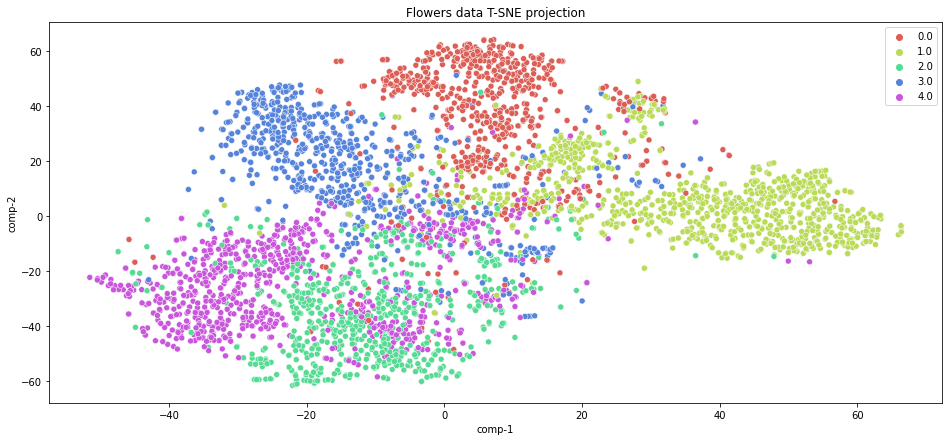

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(f_all) 

df = pd.DataFrame()
df["y"] = y_all
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

plt.figure(figsize=(16,7))

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="Flowers data T-SNE projection") 

### Question 23

> QUESTION 23: In order to inspect the high-dimensional features, t-SNE is a popular off-the-shelf
choice for visualizing Vision features. Map the features you have extracted onto 2 dimensions with
t-SNE. Then plot the mapped feature vectors along x and y axes. Color-code the data points with
ground-truth labels. Describe your observation.

- From the T-SNE plot above, we can see that data points from the same class are almost clustered together, meaning that even though VGG extraction greatly reduced the feature dimension, most of the information from the original data are still preserved.

#### MLP Classifier

In [ ]:
def _plot_Multi_Class_confusion_matrix(actual, predicted, title = 'Multi-Class Confusion Matrix'):
    cm = confusion_matrix(y_true = actual, y_pred = predicted)
    cmd_obj = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(25,25))
    ax.set_title(title, fontsize = 23)
    ax.set_xlabel("Predicted Label", fontsize = 22)
    ax.set_ylabel("Actual Label", fontsize = 22)
    ax.tick_params(axis='both', which='major', labelsize=15)
    cmd_obj.plot(ax=ax)
    #     plt.figure(figsize=(15, 15))
    plt.show()

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), 
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()
    
    
    def forward(self, X):
        return self.model(X)
    
    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

#         self.model.train()
        
        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                ##################################
                # you should implement this part #
                ##################################
                # clear the gradients
                optimizer.zero_grad()
                clf = self.model(X_)
                loss = criterion(clf, y_)
                loss.backward()
                optimizer.step()
                
        return self
    
    def eval(self, X_test, y_test):
        ##################################
        # you should implement this part #
        ##################################
        X_tensor = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y_pred = self.model(X_tensor).cpu().detach().numpy()
        class_pred = np.argmax(y_pred, axis = 1)
        print('MLP:')
        print("Accuracy: ", accuracy_score(y_test, class_pred))
        print("Precision: ", precision_score(y_test, class_pred, average='macro'))
        print("Recall: ", recall_score(y_test, class_pred, average='macro'))
        print("F1-score: ", f1_score(y_test, class_pred, average='macro'))
        cm = confusion_matrix(y_test, class_pred)
        _plot_Multi_Class_confusion_matrix(y_test,class_pred)
        plt.show()
        return pd.DataFrame({'Accuracy': [accuracy_score(y_test, class_pred)],
                             'Precision': [precision_score(y_test, class_pred, average='macro')],
                             'Recall': [recall_score(y_test, class_pred, average='macro')],
                             'F1-score': [f1_score(y_test, class_pred, average='macro')]})

#### MLP with VGG data, without PCA

<ipython-input-40-fac889e7fd4b>:20: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  y = torch.tensor(y, dtype=torch.int64, device='cuda')
100%|██████████| 100/100 [00:08<00:00, 11.80it/s]


MLP:
Accuracy:  0.8978201634877384
Precision:  0.8964952086340571
Recall:  0.895612097809811
F1-score:  0.8958794721350202


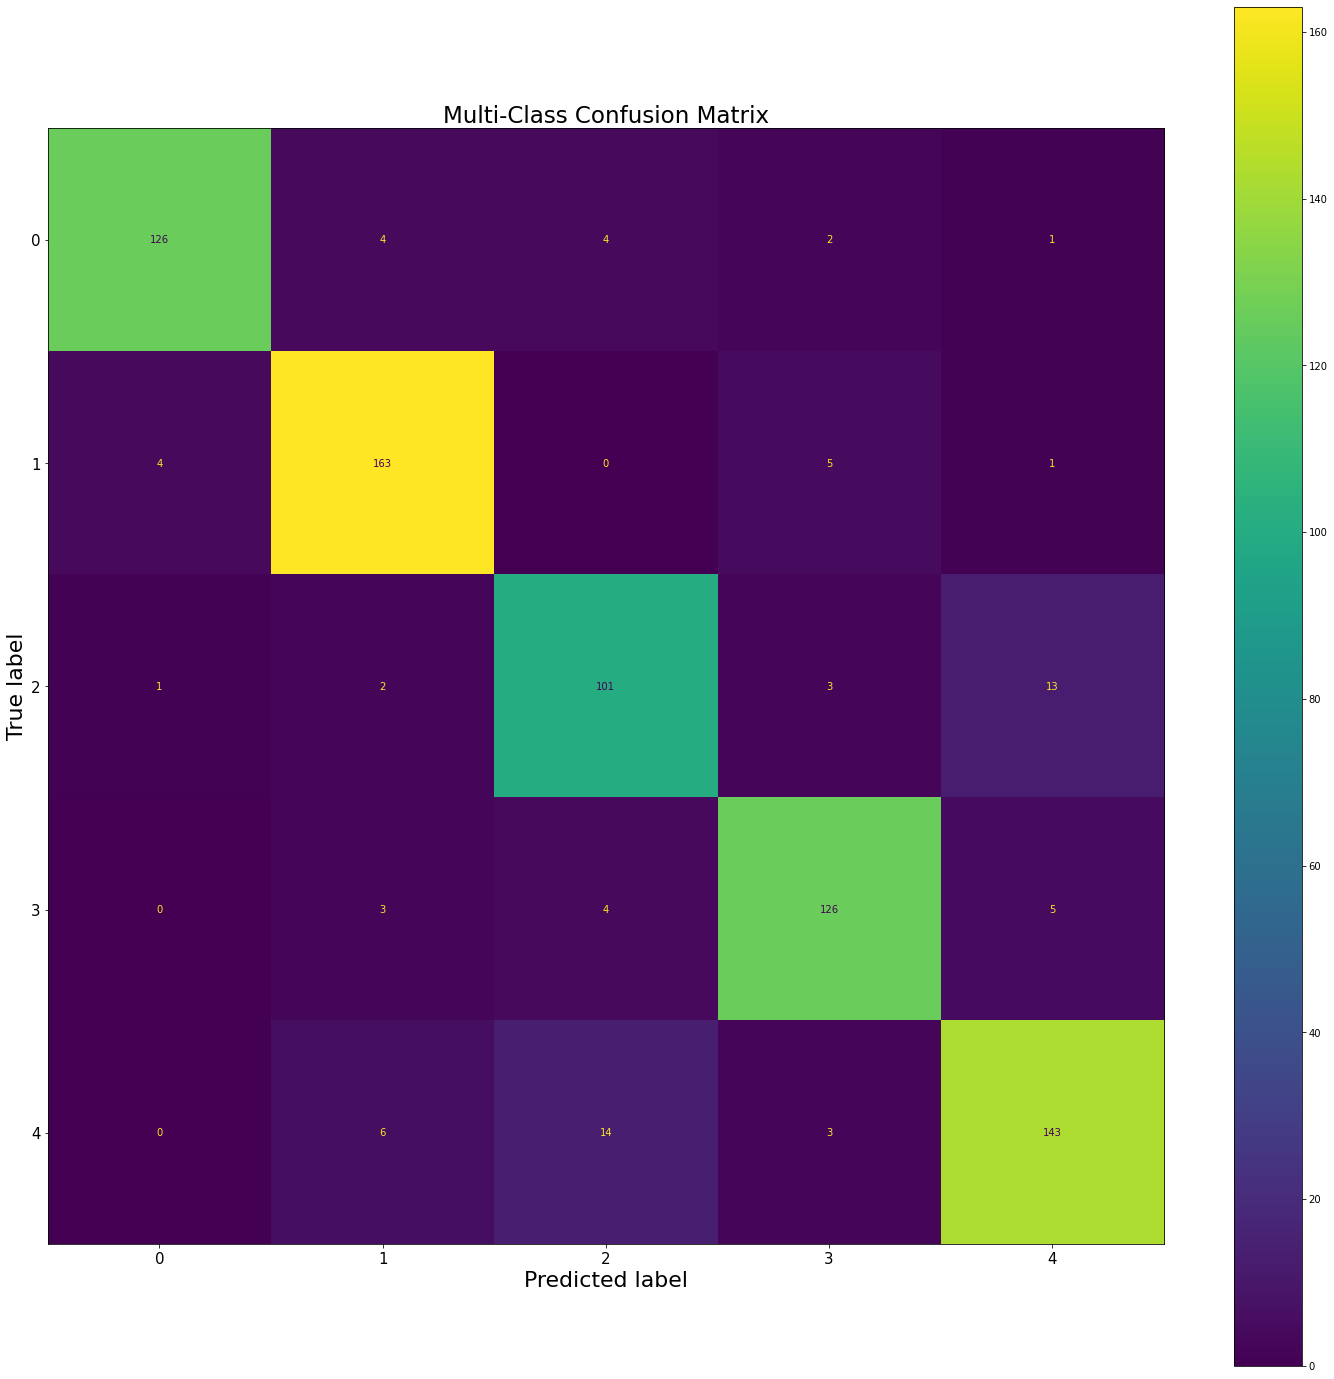

,Accuracy,Precision,Recall,F1-score
0,0.89782,0.896495,0.895612,0.895879


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(f_all, list(y_all), test_size=0.2, random_state=42)
mlp_no_PCA = MLP(f_all.shape[1])
mlp_no_PCA.train(X_train,y_train)
mlp_no_PCA.eval(X_test,y_test)

In [ ]:
f_all.shape

(3670, 4096)

#### MLP with VGG data, with PCA

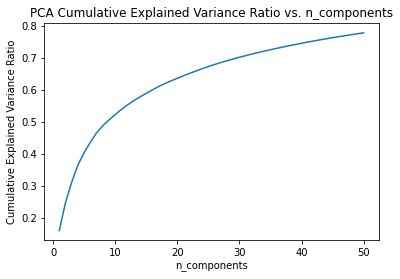

In [ ]:
pca = PCA(n_components=50).fit(f_all)
f_pca = pca.fit_transform(f_all)
plt.title('PCA Cumulative Explained Variance Ratio vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.plot(range(1,51), pca.explained_variance_ratio_.cumsum())

- We choose n_components to be 20 by observing the elbow plot above.

<ipython-input-40-fac889e7fd4b>:20: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  y = torch.tensor(y, dtype=torch.int64, device='cuda')
100%|██████████| 100/100 [00:06<00:00, 15.28it/s]


MLP:
Accuracy:  0.8828337874659401
Precision:  0.8821428452085682
Recall:  0.8824522615937818
F1-score:  0.8818306557339339


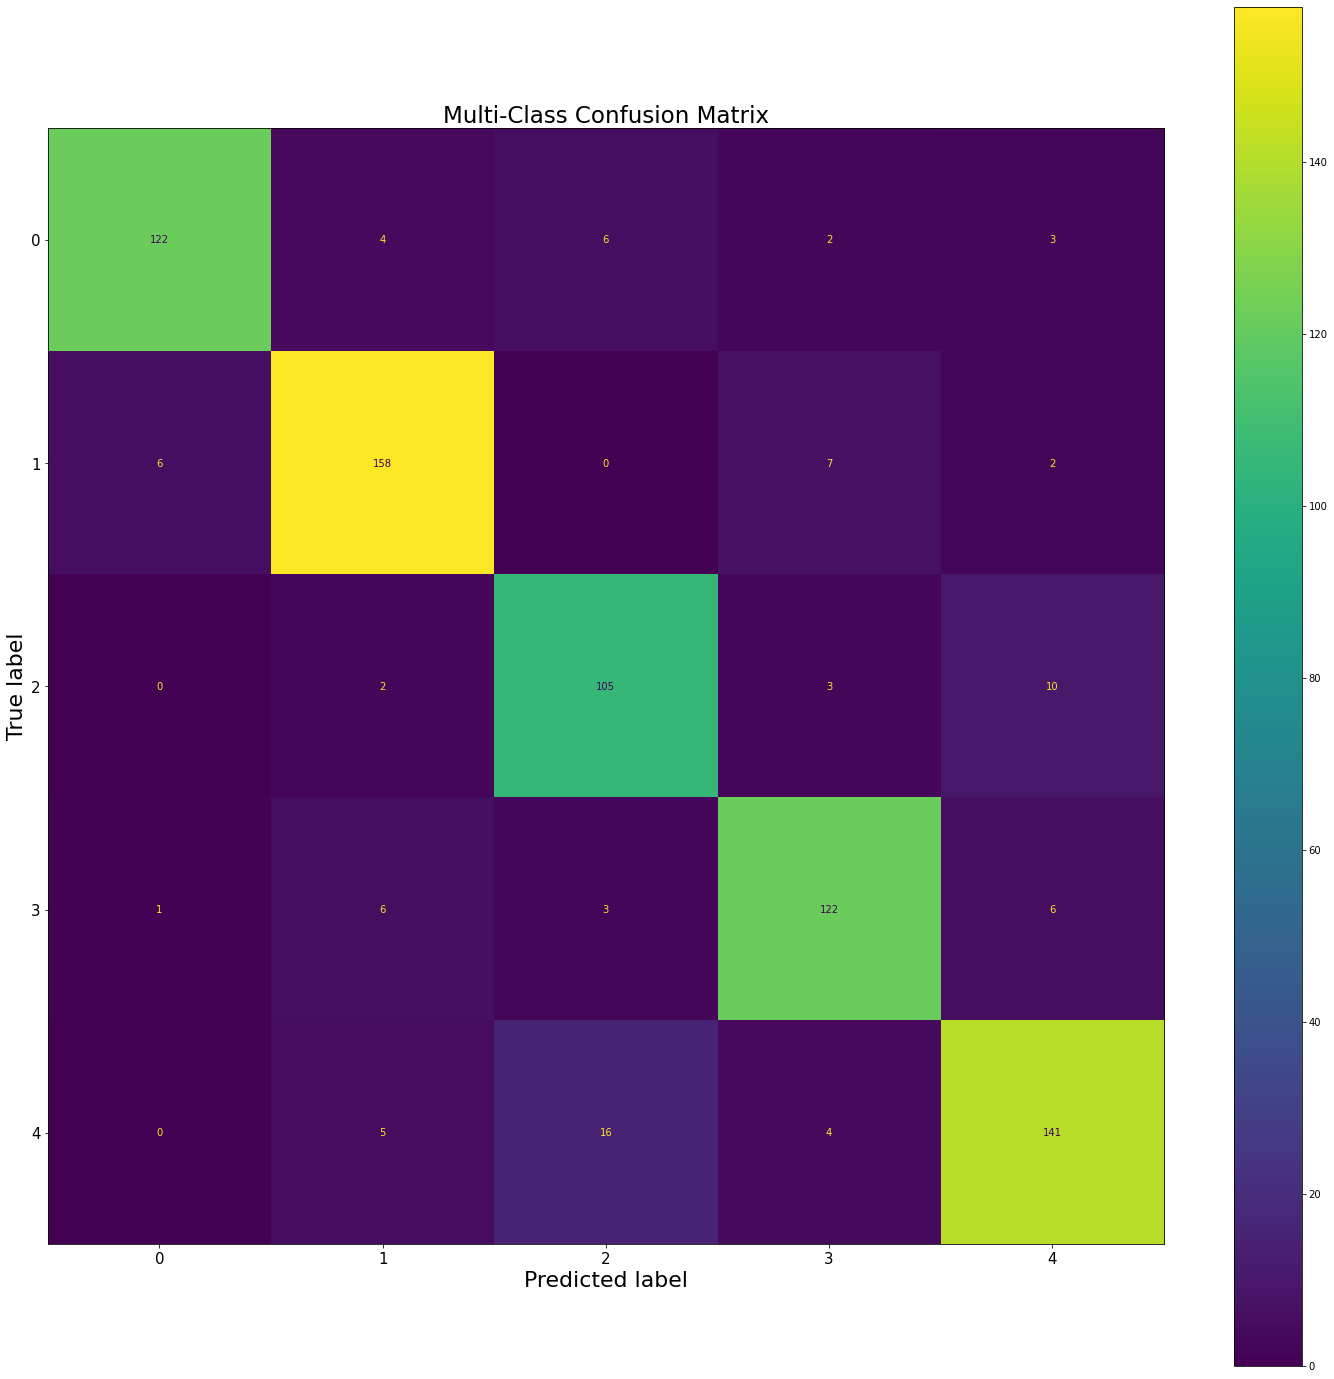

,Accuracy,Precision,Recall,F1-score
0,0.882834,0.882143,0.882452,0.881831


In [ ]:
f_pca = PCA(n_components=20).fit_transform(f_all)
X_train, X_test, y_train, y_test = train_test_split(f_pca, list(y_all), test_size=0.2, random_state=42)
mlp = MLP(X_train.shape[1])
mlp.train(X_train,y_train)
mlp.eval(X_test,y_test)

#### Autoencoder

In [ ]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None
        
    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))
    
    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    
    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self     
        
    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

100%|██████████| 100/100 [00:22<00:00,  4.48it/s]


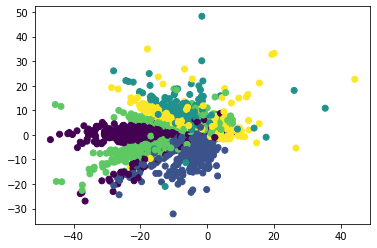

In [ ]:
X_em =Autoencoder(2).fit_transform(f_all)
plt.scatter(*X_em.T, c=y_all)

#### Grid Search

In [ ]:
#=============== Dimensionality Reduction ===================
# from umap import UMAP
from sklearn.decomposition import TruncatedSVD


# SVD
svd = TruncatedSVD(n_components=50)

#Autoencoder
AutoEn =Autoencoder(2)

#UMAP
import umap.umap_ as umap
UMAP = umap.UMAP(n_components=50, metric="cosine")

In [ ]:
#===============Clustering Techniques===================
#KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)

#HDBSCAN
import hdbscan

# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
Agglo = AgglomerativeClustering(n_clusters= 5, linkage='ward')

In [ ]:
#=============== Pipeline ===================
train_dataset = f_all
gt = y_all

stats_df = pd.DataFrame(columns = ['Dim Reduction Method', 'Clustering Method','Rand Score'])

dim_method_dict = {'SVD': svd,
                   'Autoencoder': AutoEn,
                   'UMAP': UMAP
                  }

clustering_method_dict = {'kmeans': KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30),
                          'Agglo': Agglo
                  }
train = f_all
gt = y_all

for i in ['UMAP', 'None','SVD','Autoencoder']:
    if i == 'None':
        train_reduced = train
    else:
        dim_method_ = dim_method_dict[i]
        train_reduced = dim_method_.fit_transform(train)
    for j in ['Agglo', 'kmeans', 'HDBSCAN']:
        if j == 'HDBSCAN':
          for mcs in [20,50]:
            for mss in [100,200]:
              hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples=mss)
              pred = hdbscan_model.fit_predict(train_reduced)
              c_name = j + '_' + str(mcs) + '_' + str(mss)
              adjusted_rand = adjusted_rand_score(gt, pred)
              stats_df = pd.concat([stats_df, pd.DataFrame({'Dim Reduction Method':[i], 
                                    'Clustering Method':[c_name],
                                    'Rand Score':[adjusted_rand]})], ignore_index = True)
        else:
          c_name = j
          pred = clustering_method_dict[j].fit_predict(train_reduced)
          adjusted_rand = adjusted_rand_score(gt, pred)
          stats_df = pd.concat([stats_df, pd.DataFrame({'Dim Reduction Method':[i], 
                                    'Clustering Method':[c_name],
                                    'Rand Score':[adjusted_rand]})], ignore_index = True)
        
stats_df



In [ ]:
stats_df.sort_values(by = ['Clustering Method', 'Dim Reduction Method'])

,Dim Reduction Method,Clustering Method,Rand Score
18,Autoencoder,Agglo,0.230285
6,None,Agglo,0.188553
12,SVD,Agglo,0.142140
0,UMAP,Agglo,0.455475
20,Autoencoder,HDBSCAN_20_100,0.068174
8,None,HDBSCAN_20_100,0.000000
14,SVD,HDBSCAN_20_100,0.000000
2,UMAP,HDBSCAN_20_100,0.095357
21,Autoencoder,HDBSCAN_20_200,0.034037
9,None,HDBSCAN_20_200,0.000000


### Question 24

> Question: Report the best result (in terms of rand score) within the table below.For HDBSCAN, introduce a conservative parameter grid over min cluster size and min samples.

- From the table above, we can see that using dimensionality reduction increases the rand score for almost every clustering method despite the low score. This may be due to the fact that the original training data still have too many features for the clustering methods to handle. In this case, reducing feature dimensions by sacrificing some information is beneficial for model performance.

#### MLP with dim reduction

In [ ]:
# Initialize the model
assert torch.cuda.is_available()

X_train, X_test, y_train, y_test = train_test_split(f_all, list(y_all), test_size=0.2, random_state=0)

mlp_stats_df = pd.DataFrame(columns = ['Dim Reduction Method',
                                       'Accuracy', 'Precision','Recall','F1-score'])

for i in ['UMAP','None','SVD','Autoencoder']:
    if i == 'None':
        train_reduced = X_train 
        test_reduced = X_test
    else:
        dim_method_ = dim_method_dict[i]
        train_reduced = dim_method_.fit_transform(X_train)
        test_reduced = dim_method_.fit_transform(X_test)
    
    mlp = MLP(train_reduced.shape[1])
    mlp.train(train_reduced,y_train)
    
    scores = mlp.eval(test_reduced,y_test)
    scores['Dim Reduction Method'] = i
    mlp_stats_df = pd.concat([mlp_stats_df,scores],ignore_index = True)

In [ ]:
mlp_stats_df

,Dim Reduction Method,Accuracy,Precision,Recall,F1-score
0,UMAP,0.253406,0.051169,0.200000,0.081490
1,None,0.900545,0.897397,0.895367,0.896160
2,SVD,0.245232,0.241556,0.233734,0.235626
3,Autoencoder,0.301090,0.174853,0.267362,0.207215


### Question 25

> QUESTION 25: Report the test accuracy of the MLP classifier on the original VGG features.Report the same when using the reduced-dimension features (you have freedom in choosing the dimensionality reduction algorithm and its parameters). Does the performance of the model suffer with the reduced-dimension representations? Is it significant? Does the success in classification make sense in the context of the clustering results obtained for the same features in Question 24

- In the case of MLP, we observe that the model performance gets worse by a very significant amount after reducing dimensions. This make sense because the VGG feature representation is already super dense, meaning that each dimension contains a great amount of information, so even if we further reduce the dimension only by a little bit, a huge amount of information will be lost during the process, not to mention such aggressive techniques as SVD and UMAP. Similar conclusion can also be verified by the PCA plot we draw earlier. We can see that even after increasing the number of components to 50, adding one more component still increases the cumulative explained ratio by a lot. So, when we have a classification model that can handle high dimensional data, or a very dense input feature matrix, we should be cautious at futher reducing the dimensionality.